In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
admis = pd.read_csv('../Data Files/NSS_Hospital_Inpatient_Admissions.csv',
                    infer_datetime_format=True, parse_dates=[8,9],
                   dtype= {6:'str',12:'str',14:'str',15:'str'})
visits = pd.read_csv('../Data Files/NSS_PrimaryCare_Office_Visits.csv',
                     infer_datetime_format=True, parse_dates=[12],
                    dtype={8:'str',9:'str',10:'str',11:'str'})
mem = pd.read_csv('../Data Files/NSS_GreatCare_Members.csv',
                  infer_datetime_format=True, parse_dates=[5,61,62],
                 dtype= {6:'str',10:'str',11:'str',13:'str'})
print(admis.shape)
print(visits.shape)
print(mem.shape)

C:\Users\pfbab\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3,5,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


(6213, 23)
(231373, 18)
(61519, 63)


In [3]:
print(admis.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6213 entries, 0 to 6212
Data columns (total 23 columns):
 #   Column                                               Non-Null Count  Dtype         
---  ------                                               --------------  -----         
 0   Encounter ID                                         6213 non-null   object        
 1   Patient ID                                           6213 non-null   object        
 2   Encounter Primary Payor ID                           6213 non-null   object        
 3   Encounter Primary Plan ID                            6213 non-null   object        
 4   Facility Provider ID                                 6213 non-null   object        
 5   Attending Provider ID                                5884 non-null   object        
 6   Attending Provider NPI                               5884 non-null   object        
 7   Facility Provider NPI                                6213 non-null   object        
 8 

In [4]:
readmitindex = pd.DataFrame()
indextemp = pd.DataFrame()
readmit = 0
#pull patient numbers that have more then one admission to loop through
for patnum in admis['Patient ID'].drop_duplicates():
    window = pd.to_datetime(0) #set window as a datetime to make first loop work
    #create dataframe for each patient number keeping only the final discharge per Start Date
    patient = admis[admis['Patient ID']==patnum]
    patient = patient.sort_values(['Encounter Start Date','Encounter End Date']).drop_duplicates(subset=['Patient ID','Encounter End Date'], keep='first')
    patient = patient.sort_values('Encounter End Date').drop_duplicates(subset=['Patient ID','Encounter Start Date'], keep='last')
    
    for rnum in range(0,len(patient)):
        if window < patient.iloc[rnum,8] :
            #test all admissions after rnum
            trigger = patient.iloc[rnum+1:,8]<=(patient.iloc[rnum,9] + pd.DateOffset(days=30)) #column 8=start, 9=end
            #add one if there are Trues
            readmit = readmit + int(trigger.sum() > 0)
            #save 30 day window date to remove dupicate dates
            window = (patient.iloc[rnum,9] + pd.DateOffset(days=30))
            if trigger.sum() > 0:
                readmitindex = readmitindex.append(patient.iloc[rnum])
            else:
                indextemp = indextemp.append(patient.iloc[rnum])

readmitindex['readmit'] = True
indextemp['readmit'] = False
                
index =  readmitindex.append(indextemp)               

In [5]:
readmit

527

In [6]:
readmitindex  #.to_csv('../output/readmitindex.csv')  #row count for numerator

,Attending Provider ID,Attending Provider NPI,CMS Admit Source Code,CMS Admit Type Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Encounter End Date,Encounter ID,Encounter Primary Payor ID,Encounter Primary Plan ID,...,Is Observation Stay Parent Encounter,Patient ID,Patient Paid Amount,Primary Plan Allowed Amount,Primary Plan Paid Amount,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,readmit
35,DS1|NPI|1518963032,1518963032,1,1,01,23,2013-03-23,HIA|DS1|10451|DS1|NPI|1063412005|1,DS1|1,DS1|5047X,...,0.0,DS1|10451,250.0,0.0,5568.00,NaN,NaN,980.0,Toxic effect of ethyl alcohol,True
39,DS1|NPI|1073566931,1073566931,1,1,06,21,2013-07-01,HIA|DS1|10451|DS1|NPI|1427055839|3,DS1|1,DS1|5047X,...,0.0,DS1|10451,0.0,0.0,35265.00,NaN,NaN,571.2,Alcoholic cirrhosis of liver,True
42,DS1|NPI|1679541775,1679541775,1,1,01,21,2013-11-20,HIA|DS1|10451|DS1|NPI|1427055839|6,DS1|1,DS1|5047X,...,0.0,DS1|10451,0.0,0.0,41612.70,K76.6,Portal hypertension,NaN,NaN,True
34,DS1|NPI|1306902739,1306902739,1,1,01,21,2014-04-26,HIA|DS1|10451|DS1|NPI|1023010113|1,DS1|1,DS1|5047X,...,0.0,DS1|10451,250.0,0.0,21873.72,K74.60,Unspecified cirrhosis of liver,NaN,NaN,True
51,DS1|NPI|1750312146,1750312146,1,3,01,11,2012-11-16,HIA|DS1|10507|DS1|NPI|1902803315|1,DS1|1,DS1|5047W,...,1.0,DS1|10507,250.0,0.0,30460.33,O24.424,"Gestational diabetes mellitus in childbirth, i...",NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6178,DS1|NPI|1972758787,1972758787,1,1,02,21,2014-03-22,HIA|DS1|9770|DS1|NPI|1750491247|1,DS1|1,DS1|5047W,...,0.0,DS1|9770,250.0,0.0,9702.46,NaN,NaN,410.71,"Subendocardial infarction, initial episode of ...",True
6184,DS1|NPI|1982836466,1982836466,1,2,01,21,2013-01-11,HIA|DS1|9809|DS1|NPI|1689608150|1,DS1|1,DS1|5047W,...,0.0,DS1|9809,250.0,0.0,10721.07,I48.1,Persistent atrial fibrillation,NaN,NaN,True
6198,DS1|NPI|1376864215,1376864215,1,1,02,21,2011-01-24,HIA|DS1|9935|DS1|NPI|1669456299|1,DS1|1,DS1|5047X,...,0.0,DS1|9935,250.0,0.0,14745.45,I77.3,Arterial fibromuscular dysplasia,NaN,NaN,True
6201,DS1|NPI|1932297231,1932297231,2,3,06,21,2013-10-16,HIA|DS1|9943|DS1|NPI|1184722779|1,DS1|1,DS1|5047X,...,0.0,DS1|9943,160.0,0.0,88974.14,K95.09,Other complications of gastric band procedure,NaN,NaN,True


In [7]:
index #row count for denominator

,Attending Provider ID,Attending Provider NPI,CMS Admit Source Code,CMS Admit Type Code,CMS Patient Discharge Status Code,CMS Place of Service Code,Encounter End Date,Encounter ID,Encounter Primary Payor ID,Encounter Primary Plan ID,...,Is Observation Stay Parent Encounter,Patient ID,Patient Paid Amount,Primary Plan Allowed Amount,Primary Plan Paid Amount,Principal Discharge Diagnosis ICD-10-CM Code,Principal Discharge Diagnosis ICD-10-CM Description,Principal Discharge Diagnosis ICD-9-CM Code,Principal Discharge Diagnosis ICD-9-CM Description,readmit
35,DS1|NPI|1518963032,1518963032,1,1,01,23,2013-03-23,HIA|DS1|10451|DS1|NPI|1063412005|1,DS1|1,DS1|5047X,...,0.0,DS1|10451,250.0,0.0,5568.00,NaN,NaN,980.0,Toxic effect of ethyl alcohol,True
39,DS1|NPI|1073566931,1073566931,1,1,06,21,2013-07-01,HIA|DS1|10451|DS1|NPI|1427055839|3,DS1|1,DS1|5047X,...,0.0,DS1|10451,0.0,0.0,35265.00,NaN,NaN,571.2,Alcoholic cirrhosis of liver,True
42,DS1|NPI|1679541775,1679541775,1,1,01,21,2013-11-20,HIA|DS1|10451|DS1|NPI|1427055839|6,DS1|1,DS1|5047X,...,0.0,DS1|10451,0.0,0.0,41612.70,K76.6,Portal hypertension,NaN,NaN,True
34,DS1|NPI|1306902739,1306902739,1,1,01,21,2014-04-26,HIA|DS1|10451|DS1|NPI|1023010113|1,DS1|1,DS1|5047X,...,0.0,DS1|10451,250.0,0.0,21873.72,K74.60,Unspecified cirrhosis of liver,NaN,NaN,True
51,DS1|NPI|1750312146,1750312146,1,3,01,11,2012-11-16,HIA|DS1|10507|DS1|NPI|1902803315|1,DS1|1,DS1|5047W,...,1.0,DS1|10507,250.0,0.0,30460.33,O24.424,"Gestational diabetes mellitus in childbirth, i...",NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6206,DS1|NPI|1205105731,1205105731,1,1,01,23,2014-02-19,HIA|DS1|9965|DS1|NPI|1184722779|1,DS1|1,DS1|5047W,...,0.0,DS1|9965,250.0,0.0,12066.00,K80.44,Calculus of bile duct with chronic cholecystit...,NaN,NaN,False
6207,DS1|NPI|1316989247,1316989247,1,1,01,23,2015-09-05,HIA|DS1|9978|DS1|NPI|1427055839|1,DS1|1,DS1|5047X,...,0.0,DS1|9978,250.0,0.0,22217.80,NaN,NaN,532.50,Chronic or unspecified duodenal ulcer with per...,False
6208,DS1|NPI|1720043417,1720043417,2,2,06,21,2015-02-11,HIA|DS1|9979|DS1|NPI|1689772592|1,DS1|1,DS1|5047X,...,0.0,DS1|9979,250.0,0.0,23598.00,O44.13,"Complete placenta previa with hemorrhage, thir...",NaN,NaN,False
6209,DS1|NPI|1215968474,1215968474,1,3,01,21,2014-08-10,HIA|DS1|9981|DS1|NPI|1427055839|1,DS1|1,DS1|5047W,...,1.0,DS1|9981,250.0,0.0,14800.00,NaN,NaN,664.11,"Second-degree perineal laceration, delivered, ...",False


([<matplotlib.patches.Wedge at 0x22356331640>,
 [Text(-1.0511738568800777, 0.32408875730555986, ''),
  Text(1.0511738265366934, -0.32408885572355833, '')])

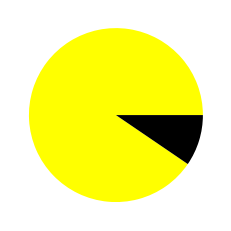

In [8]:
fig1, ax1 = plt.subplots()
ax1.pie(index.readmit.value_counts(), colors=['yellow','black'])